In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from subprocess import call
from sklearn import datasets, preprocessing

In [7]:
main_data = pd.read_csv("Dataset2.csv")
label_encoder = preprocessing.LabelEncoder()

for data in main_data:
  print(f"Heading : {data}")
  print(list(main_data[data]))
  print("\n")
  main_data[data] = label_encoder.fit_transform(main_data[data])
  print(f"After the tranformation of {data}")
  print(list(main_data[data]))
  print("\n\n")

Heading : Outlook
['R', 'R', 'O', 'S', 'S', 'S', 'O', 'R', 'R', 'S', 'R', 'O', 'O', 'S']


After the tranformation of Outlook
[1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2]



Heading : Temp
['H', 'H', 'H', 'M', 'M', 'M', 'C', 'C', 'C', 'M', 'M', 'M', 'H', 'M']


After the tranformation of Temp
[1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2]



Heading : Wind
['F', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'T']


After the tranformation of Wind
[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1]



Heading : Humidity
['Normal', 'High', 'Normal', 'Normal', 'Normal', 'Low', 'Normal', 'Normal', 'Low', 'High', 'High', 'Low', 'Normal', 'Normal']


After the tranformation of Humidity
[2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2]



Heading : Class
['N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N']


After the tranformation of Class
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]





In [9]:
combined_features = tuple(zip(main_data["Outlook"], main_data["Temp"], main_data["Wind"], main_data["Humidity"]))

print("Outlook, Temp, Wind, Humidity\n\n")
for pair in combined_features:
    print(pair)


Outlook, Temp, Wind, Humidity


(1, 1, 0, 2)
(1, 1, 1, 0)
(0, 1, 0, 2)
(2, 2, 0, 2)
(2, 2, 0, 2)
(2, 2, 1, 1)
(0, 0, 1, 2)
(1, 0, 0, 2)
(1, 0, 0, 1)
(2, 2, 0, 0)
(1, 2, 1, 0)
(0, 2, 1, 1)
(0, 1, 0, 2)
(2, 2, 1, 2)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(combined_features, main_data["Class"], test_size = 0.1, random_state = 74)
print(X_train)

[(0, 1, 0, 2), (1, 1, 0, 2), (1, 0, 0, 1), (1, 0, 0, 2), (1, 1, 1, 0), (2, 2, 0, 2), (2, 2, 1, 1), (2, 2, 1, 2), (2, 2, 0, 2), (0, 1, 0, 2), (2, 2, 0, 0), (0, 2, 1, 1)]


In [14]:
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)

In [16]:
print("Accuracy is ", sklearn.metrics.accuracy_score(Y_test, Y_pred))
print(X_test)
print("y predicted : ", Y_pred)
print(f"Actual y_test {Y_test}")

Accuracy is  0.5
[(1, 2, 1, 0), (0, 0, 1, 2)]
y predicted :  [0 1]
Actual y_test 10    1
6     1
Name: Class, dtype: int64


Confusion matrix: 
[[0 0]
 [1 1]]


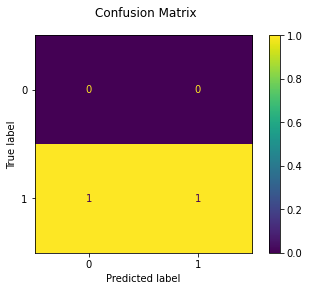

In [17]:
disp = sklearn.metrics.plot_confusion_matrix(dtc, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix: \n{disp.confusion_matrix}")
plt.show()

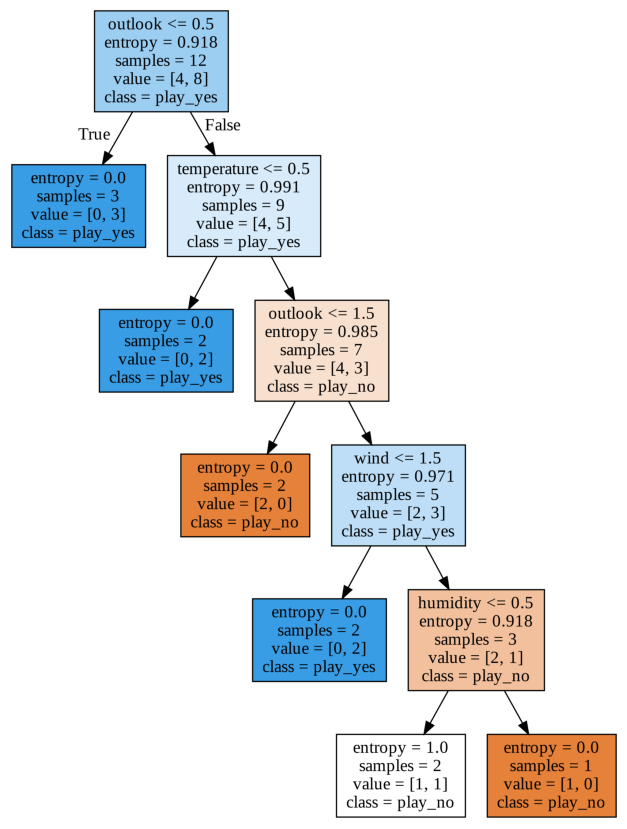

In [18]:
export_graphviz(dtc, out_file='tree.dot',feature_names=['outlook','temperature','humidity','wind'],class_names=['play_no','play_yes'],filled=True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

plt.figure(figsize = (15, 15))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();